In [18]:
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import utils
from scipy.optimize import minimize
import numpy as np

## Reading in Data

In [19]:
# Readin the dataframe and converting strings to dates and floats
btc_df = pd.read_csv("Data.csv", index_col=0, parse_dates=True)
btc_df["price"] = btc_df["price"].str.replace(",", "").astype(float)
btc_df["price_change"] = btc_df["price"] - btc_df["price"].shift(1)
btc_ar = btc_df.values

# Verifying that no days are missing in the model
assert all(btc_df.index.to_series() == pd.date_range(start="2020-04-25", end="2025-10-15"))

## First Autoregressive Model Experiment

Here we'll try to model the future price based on two days; one from a week ago and one from a month ago.

In [20]:
def build_guess_column(params, df, shifts, col_name="price", est_name="estimation_column"):
    """
    Adds a new column to the input dataframe that builds the estimated values out of linear transformations of shifted columns.
    """
    df = df.copy()
    df[est_name] = sum([params[i] * df[col_name].shift(shift) for i, shift in enumerate(shifts)])
    return df

In [21]:
def compute_loss(params, df, shifts, col_name="price", est_name="estimation_column"):
    """
    Computes the loss for a guess. Uses mean-squares as the loss function.
    """
    est_df = build_guess_column(params, df, shifts, col_name=col_name, est_name=est_name)
    diff = (est_df[col_name] - est_df[est_name])**2
    return diff.sum()

Optimal exposures: [ 9.47968367e-01  6.64028361e-02  5.79008428e-03 -2.71816842e-03
  1.04620892e-02 -2.36729247e-02 -1.55640156e-02 -4.75598596e-02
  9.94382004e-02 -2.11569751e-02  5.44086205e-03 -6.67690965e-02
  8.79174935e-02 -2.80784081e-02 -3.92850368e-02 -4.78485181e-03
  4.12021503e-02 -3.04876293e-02 -2.25345902e-02  2.37396305e-02
  1.26301356e-02 -3.33193388e-03 -3.15317018e-02  8.16292573e-02
 -8.32129645e-04 -2.11490465e-02  3.67545442e-02  4.48897926e-03
 -6.45048107e-02]
Optimal loss:      2584791495.1319637


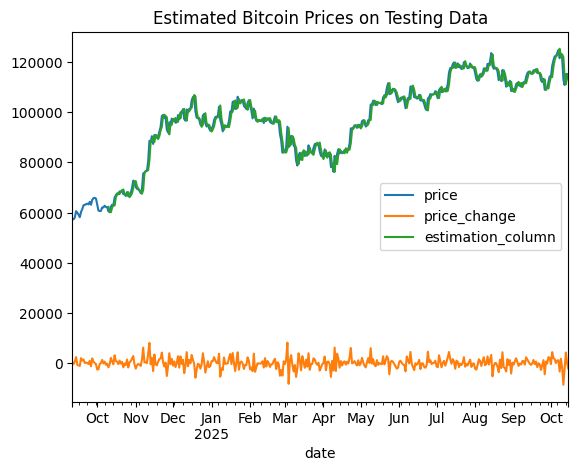

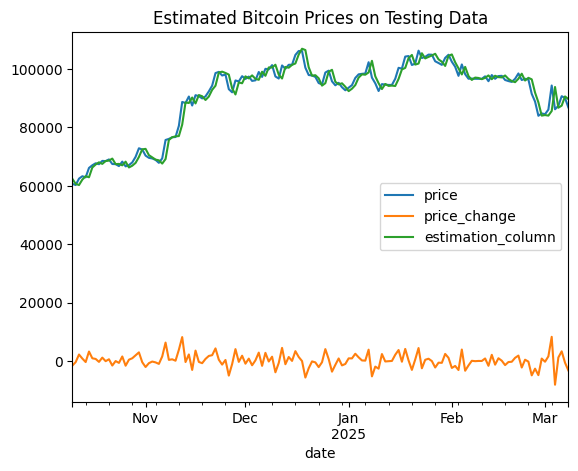

In [23]:
# Making a train-test split
n = len(btc_df)
btc_df_train, btc_df_test = btc_df.iloc[:int(0.8*n)], btc_df.iloc[int(0.8*n):]

# Training the coefficients
shifts = list(range(1, 30, 1))
x0 = [1 for _ in range(len(shifts))]
result = minimize(compute_loss, x0, args=(btc_df_train, shifts))

print(f"Optimal exposures: {result.x}")
print(f"Optimal loss:      {result.fun}")

# Graphing the daily guesses
params = result.x

est_df = build_guess_column(params, btc_df_test, shifts)
est_df.plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

est_df.iloc[max(shifts):max(shifts) + 150].plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

## Experimenting on daily returns instead of daily prices

In [ ]:
# Making a returns df
ret_df = 

# Making a train-test split
n = len(btc_df)
btc_df_train, btc_df_test = btc_df.iloc[:int(0.8*n)], btc_df.iloc[int(0.8*n):]

# Training the coefficients
shifts = list(range(1, 50, 1))
x0 = [1 for _ in range(len(shifts))]
result = minimize(compute_loss, x0, args=(btc_df_train, shifts))

print(f"Optimal exposures: {result.x}")
print(f"Optimal loss:      {result.fun}")

# Graphing the daily guesses
params = result.x

est_df = build_guess_column(params, btc_df_test, shifts)
est_df.plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

est_df.iloc[max(shifts):max(shifts) + 150].plot()
plt.title("Estimated Bitcoin Prices on Testing Data")
plt.show()

test indices again

In paper mention off by one error things